# Module 6 - Programming Assignment

## Directions

1. Change the name of this file to be your JHED id as in `jsmith299.ipynb`. Because sure you use your JHED ID (it's made out of your name and not your student id which is just letters and numbers).
2. Make sure the notebook you submit is cleanly and fully executed. I do not grade unexecuted notebooks.
3. Submit your notebook back in Blackboard where you downloaded this file.

*Provide the output **exactly** as requested*

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import networkx as nx
import random
from copy import deepcopy

**For this assignment only**

If you want to use NetworkX with your assignment, you can do:

```
conda install networkx
```
or

```
pip install networkx
```

Additionally, this assignment uses a recursive algorithm. You should use `deecopy` at the appropriate places to avoid entanglement issues.

## CSP: Map Coloring

In this programming assignment, you will be using your new understanding of **Constraint Satisfaction Problems** to color maps. As we know from the [Four Color Theorem](http://en.wikipedia.org/wiki/Four_color_theorem) any division of a plane into contiguous regions can be colored such that no two adjacent regions are the same color by using only four colors.

From the book, we know that we can translate this problem into a CSP where the map is represented as a [planar graph](http://en.wikipedia.org/wiki/Planar_graph) and the goal is to color all the nodes such that no adjacent nodes are colored the same color.

As with most AI problems, this requires us to figure out how best to represent the problem--and the solution--given the high and low level data structures and types at our disposal. For this problem, we'll settle on a Dict which contains at least two keys: "nodes" which is an *ordered* List of Strings that represents each node or vertex in the planar graph and "edges" which contains a List of Tuples that represent edges between nodes. The Tuples are of ints that represent the index of the node in the "nodes" list.

Using this system, and adding a "coordinates" key with abstract drawing coordinates of each node for NetworkX, we can represent the counties of Connecticut like so:

In [2]:
connecticut = { "nodes": ["Fairfield", "Litchfield", "New Haven", "Hartford", "Middlesex", "Tolland", "New London", "Windham"],
                "edges": [(0,1), (0,2), (1,2), (1,3), (2,3), (2,4), (3,4), (3,5), (3,6), (4,6), (5,6), (5,7), (6,7)],
                "coordinates": [( 46, 52), ( 65,142), (104, 77), (123,142), (147, 85), (162,140), (197, 94), (217,146)]}
print(connecticut)

{'nodes': ['Fairfield', 'Litchfield', 'New Haven', 'Hartford', 'Middlesex', 'Tolland', 'New London', 'Windham'], 'edges': [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (2, 4), (3, 4), (3, 5), (3, 6), (4, 6), (5, 6), (5, 7), (6, 7)], 'coordinates': [(46, 52), (65, 142), (104, 77), (123, 142), (147, 85), (162, 140), (197, 94), (217, 146)]}


The coordinates permit us to use NetworkX to draw the graph. We'll add a helper function for this, `draw_map`, which takes our planar_map, a figure size in abstract units, and a List of color assignments in the same order as the nodes in the planar_map.  The underlying drawings are made by matplotlib using NetworkX on top of it. Incidentally, the positions just make the map "work out" on NetworkX/matplotlib.

The size parameter is actually inches wide by inches tall (8, 10) is an 8x10 sheet of paper. Why doesn't a chart cover up the whole screen then? It's adjusted by dpi. On high resolution monitors, 300 dpi with 8x10 inches might only take up a fraction of that space. Use whatever you want to make the output look good. It doesn't matter for anything else but that.

A default value for `color_assignments` is provided, `None`, that simply colors all the nodes red. Otherwise, `color_assignments` must be a `List of Tuples` where each `Tuple` is a node name and assigned color. The order of `color_assignments` must be the same as the order of `"nodes"` in the `planar_map`.

**If you are using NetworkX in your assignment, you can copy this function into module03.py**

In [3]:
def draw_map(name, planar_map, size, color_assignments=None):
    def as_dictionary(a_list):
        dct = {}
        for i, e in enumerate(a_list):
            dct[i] = e
        return dct
    
    G = nx.Graph()
    
    labels = as_dictionary(planar_map["nodes"])
    pos = as_dictionary(planar_map["coordinates"])
    
    # create a List of Nodes as indices to match the "edges" entry.
    nodes = [n for n in range(0, len(planar_map["nodes"]))]

    if color_assignments:
        colors = [c for n, c in color_assignments]
    else:
        colors = ['red' for c in range(0,len(planar_map[ "nodes"]))]

    G.add_nodes_from(nodes)
    G.add_edges_from(planar_map[ "edges"])

    plt.figure(figsize=size, dpi=100)
    plt.title(name)
    nx.draw(G, node_color = colors, with_labels = True, labels = labels, pos = pos)
    
#    plt.savefig(name + ".png")

Using this function, we can draw `connecticut`:

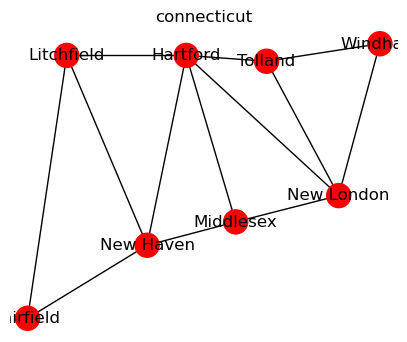

In [4]:
draw_map("connecticut", connecticut, (5,4), [(n, "red") for n in connecticut["nodes"]])

This coloring obviously has some problems! You're going to write a program to fix it.

So what we (and by "we", I mean "you") would like to do is write a program that can figure out how to color a planar map...ie, `connecticut` *and* `europe`, you will do it by implementing a function that uses the algorithms that were discussed in this module.

## Which CSP Algorithms?

You will need to implement **backtracking** and **forward checking**. You can roll your own from Depth First Search or use the pseudocode for `backtracking_search` on p. 192 of AIAMA 4th Edition.

You will also need to implement one of the following heuristics: **Minimum Remaining Values** or **Degree Heuristic** (tell me which one; it doesn't make sense to implement both) as well as **Least Constraining Value**. Break ties in ascending order (least to most).

You should get the backtracking and forward checking implemented first. Then add the heuristics. You can use the pseudocode in the book and then stub out the functions that implement the "pick a variable" heuristic and the "pick a value" heuristic. When you get it working, fill in the appropriate heuristic mentioned above.

Please change the "?" below into "yes" or "no" indicating which elements you were able to implement:

    backtracking: no
    forward checking: yes
    minimum remaining values: no
    degree heuristic: yes
    least contraining value: yes

Your function should take the following form:

```python
def color_map( planar_map, color_list, trace=False)
```

where `planar_map` has the format described above, colors is a List of Strings denoting the colors to use and `trace` operates as described in the next paragraph. It should return a List of Tuples where each Tuple is of the form `( Node Name, Color)` in the same order as the `node` entry in the planar_map. For example, if we had `["A", "B"]` as nodes and `["Yellow", "Green"]` as colors, your function might return `[("A", "Yellow"), ("B", "Green")]`. If a coloring cannot be found, return `None`.

Your function also will take an optional argument, `trace`, with a default value of `False`. 

If `trace` is set to `True` your program will print out *traces* (or debugging) statements that show what it is currently doing (in terms of the algorithms you are supposed to implement). For example, if your program starts to backtrack, the trace should say that it has to backtrack and why.

As usual, you should implement your function using helper functions, using one Markdown cell for documentation and one Codecell for implementation (one function and assertions).

-----

<a id="get_degree"></a>
## get_degree

This gets the color (or None)  for the given node using the degree heuristic. It looks at the given node, finds the already colored adjacent nodes, then picks the first available color.

Variables

* **node_index** int: the node index to find the degree of
* **planar_map** Dictionary{str:list}: the entire planar map - used for nodes information
* **color_overlay** List[Tuple(str,str)]: this is a list of colored locations as tuples of (location, color)
* **color_list** List[str]: this is the list of all possible colors
* **blacklisted** List[int]: this is the list of blacklisted nodes that we should skip for finding the degree
* **trace** bool: this is saying whether we should log print extra information to explain why certain actions were chosen

**returns** str: This is either the color value for the supplied node_index, or it is 'None' indicating that there was no valid color could be selected given the surrounding nodes.

In [5]:
def get_degree(node_index, planar_map, color_overlay, color_list, blacklisted, trace=False):
    colored_locations, locations = [c[0] for c in color_overlay], planar_map["nodes"]
    valid_indexes = [locations.index(L) for L in locations if not L in colored_locations][::-1] # reverse it to get our desired tie breaker ordering
    applicable_edges = [e for e in planar_map["edges"] if e[0] in valid_indexes or e[1] in valid_indexes] # reduce to uncolored edges
    applicable_edges = [e for e in applicable_edges if e[0] == node_index or e[1] == node_index] # reduce to node_indexes edges
    adjacent_node_indexes = []
    for e in applicable_edges:
        adjacent_node_indexes.append(e[0])
        adjacent_node_indexes.append(e[1])
    adjacent_node_indexes = sorted(set([i for i in adjacent_node_indexes if not i in blacklisted]))
    if node_index in adjacent_node_indexes:
        adjacent_node_indexes.remove(node_index)
    if trace == True:
        print('nodes adjacent to node ' + str(node_index) + ' are the following: ' + ', '.join([str(i) for i in adjacent_node_indexes]))
    available_colors = deepcopy(color_list)
    for c in color_overlay:
        location_index = locations.index(c[0])
        if location_index in adjacent_node_indexes and c[1] in available_colors:
            available_colors.remove(c[1])
    if trace == True:
        print('colors available to node ' + str(node_index) + ' are the following: ' + ', '.join([str(c) for c in available_colors]))
    if len(available_colors) == 0:
        return None
    return available_colors[0]

In [6]:
connecticut2 = { "nodes": ["Fairfield", "Litchfield", "New Haven", "Hartford", "Middlesex", "Tolland", "New London", "Windham"],
                "edges": [(0,1), (0,2), (1,2), (1,3), (2,3), (2,4), (3,4), (3,5), (3,6), (4,6), (5,6), (5,7), (6,7)],
                "coordinates": [( 46, 52), ( 65,142), (104, 77), (123,142), (147, 85), (162,140), (197, 94), (217,146)]}

assert get_degree(3, connecticut2, [],  ["blue", "green", "red", "yellow"], [], False) == 'blue'
assert get_degree(2, connecticut2, [("Hartford", "blue")],  ["blue", "green", "red", "yellow"], [], False) == 'green'
assert get_degree(7, connecticut2, [("Hartford", "blue")],  ["blue", "green", "red", "yellow"], [], False) == 'blue'

<a id="get_most_constrained_index"></a>
## get_most_constrained_index

This gets the index that is the most constrained, meaning the one with the most edges to other nodes.

Variables

* **planar_map** Dictionary{str:list}: the entire planar map - used for nodes information
* **color_overlay** List[Tuple(str,str)]: this is a list of colored locations as tuples of (location, color)
* **blacklisted** List[int]: this is the list of blacklisted nodes that we should skip for finding the degree
* **trace** bool: this is saying whether we should log print extra information to explain why certain actions were chosen

**returns** int: This is the index of the node that is the most constrained.

In [7]:
def get_most_constrained_index(planar_map, color_overlay, blacklisted, trace=False):
    colored_locations = [c[0] for c in color_overlay]
    locations = planar_map["nodes"]
    valid_indexes = [locations.index(L) for L in locations if not L in colored_locations][::-1] # reverse it to get our desired tie breaker ordering
    valid_indexes = [i for i in valid_indexes if not i in blacklisted]
    edges = planar_map["edges"]
    applicable_edges = [e for e in edges if e[0] in valid_indexes or e[1] in valid_indexes]
    most_constrained_index = -1
    max_constrained_value = -1
    for i in valid_indexes:
        constraints = 0
        for e in applicable_edges:
            if e[0] == i or e[1] == i:
                constraints += 1
        if max_constrained_value <= constraints:
            max_constrained_value = constraints
            most_constrained_index = i
    return most_constrained_index

In [8]:
connecticut3 = { "nodes": ["Fairfield", "Litchfield", "New Haven", "Hartford", "Middlesex", "Tolland", "New London", "Windham"],
                "edges": [(0,1), (0,2), (1,2), (1,3), (2,3), (2,4), (3,4), (3,5), (3,6), (4,6), (5,6), (5,7), (6,7)],
                "coordinates": [( 46, 52), ( 65,142), (104, 77), (123,142), (147, 85), (162,140), (197, 94), (217,146)]}

assert get_most_constrained_index(connecticut3, [], [], False) == 3
assert get_most_constrained_index(connecticut3, [("Hartford", "blue")], [], False) == 2
assert get_most_constrained_index(connecticut3, [("Hartford", "blue"), ("New Haven", "green")], [], False) == 6

<a id="color_map"></a>
## color_map

This goes through the process of finding the map coloring for a given planar map. It uses a combination of the degree heuristic to determine colors, and the least constraining value to determine flow of nodes to color. It implements forward checking by checking for the next color before assigning it. It attempts to implement backtracking through allowing it to take multiple random steps back and ignoring those previously failed nodes - this could be handled more elegantly.

Variables

* **planar_map** Dictionary{str:list}: the entire planar map - used for nodes information
* **color_list** List[str]: this is the list of all possible colors
* **trace** bool: this is saying whether we should log print extra information to explain why certain actions were chosen

**returns** List[Tuple(str, str)]: This returns a list of tuples that should align with the planar_map node location order. Tuples will be ('location','color') and will be used for networkx map coloring.

In [9]:
def color_map(planar_map, color_list, trace=False):
    color_list, color_overlay, color_map_history, blacklisted, steps = sorted(color_list), [], [], [], 0
    working_node = get_most_constrained_index(planar_map, color_overlay, blacklisted, trace)
    while (len(color_overlay) < len(planar_map["nodes"])) and (steps < 50):
        color = get_degree(working_node, planar_map, color_overlay, color_list, blacklisted, trace)
        if color == None:
            if trace == True:
                print('no color was found')
            blacklisted.append(working_node)
            for i in range(random.randint(0,len(color_map_history))):
                last_color = color_map_history.pop()
                color_overlay.remove((planar_map["nodes"][last_color[0]], last_color[1]))
        else:
            if trace == True:
                print('color chosen is ' + color)
            color_overlay.append((planar_map["nodes"][working_node], color))
            color_map_history.append((working_node, color))
            for i in range(random.randint(0,len(blacklisted))):
                blacklisted.pop()
        working_node = get_most_constrained_index(planar_map, color_overlay, blacklisted, trace)
        steps += 1
    final_color_overlay = []
    for location in planar_map["nodes"]:
        found = False
        for color in color_overlay:
            if location == color[0]:
                final_color_overlay.append(color)
                found = True
                break;
        if found == False:
            final_color_overlay.append((location, "red"))
    return final_color_overlay

## Problem 1. Color Connecticut Using Your Solution

In [10]:
connecticut_colors = color_map(connecticut, ["red", "blue", "green", "yellow"], trace=True)

nodes adjacent to node 3 are the following: 1, 2, 4, 5, 6
colors available to node 3 are the following: blue, green, red, yellow
color chosen is blue
nodes adjacent to node 2 are the following: 0, 1, 3, 4
colors available to node 2 are the following: green, red, yellow
color chosen is green
nodes adjacent to node 6 are the following: 3, 4, 5, 7
colors available to node 6 are the following: green, red, yellow
color chosen is green
nodes adjacent to node 1 are the following: 0, 2, 3
colors available to node 1 are the following: red, yellow
color chosen is red
nodes adjacent to node 4 are the following: 2, 3, 6
colors available to node 4 are the following: red, yellow
color chosen is red
nodes adjacent to node 5 are the following: 3, 6, 7
colors available to node 5 are the following: red, yellow
color chosen is red
nodes adjacent to node 0 are the following: 1, 2
colors available to node 0 are the following: blue, yellow
color chosen is blue
nodes adjacent to node 7 are the following: 5, 

Using the "edges" list from the connecticut map, we can test to see if each pair of adjacent nodes is indeed colored differently:

In [11]:
edges = connecticut["edges"]
nodes = connecticut[ "nodes"]
colors = connecticut_colors
COLOR = 1

for start, end in edges:
    try:
        assert colors[start][COLOR] != colors[end][COLOR]
    except AssertionError:
        print(f"{nodes[start]} and {nodes[end]} are adjacent but have the same color.")

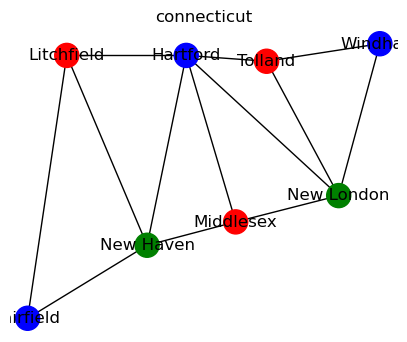

In [12]:
draw_map("connecticut", connecticut, (5,4), connecticut_colors)

nodes adjacent to node 3 are the following: 1, 2, 4, 5, 6
colors available to node 3 are the following: blue, green, red
color chosen is blue
nodes adjacent to node 2 are the following: 0, 1, 3, 4
colors available to node 2 are the following: green, red
color chosen is green
nodes adjacent to node 6 are the following: 3, 4, 5, 7
colors available to node 6 are the following: green, red
color chosen is green
nodes adjacent to node 1 are the following: 0, 2, 3
colors available to node 1 are the following: red
color chosen is red
nodes adjacent to node 4 are the following: 2, 3, 6
colors available to node 4 are the following: red
color chosen is red
nodes adjacent to node 5 are the following: 3, 6, 7
colors available to node 5 are the following: red
color chosen is red
nodes adjacent to node 0 are the following: 1, 2
colors available to node 0 are the following: blue
color chosen is blue
nodes adjacent to node 7 are the following: 5, 6
colors available to node 7 are the following: blue
col

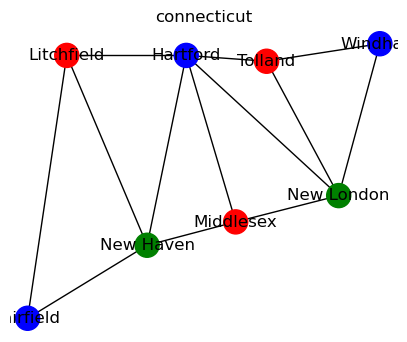

In [13]:
connecticut_colors = color_map( connecticut, ["red", "blue", "green"], trace=True)
if connecticut_colors:
    draw_map("connecticut", connecticut, (5,4), connecticut_colors)

## Problem 2. Color Europe Using Your solution

In [14]:
europe = {
    "nodes":  ["Iceland", "Ireland", "United Kingdom", "Portugal", "Spain",
                 "France", "Belgium", "Netherlands", "Luxembourg", "Germany",
                 "Denmark", "Norway", "Sweden", "Finland", "Estonia",
                 "Latvia", "Lithuania", "Poland", "Czech Republic", "Austria",
                 "Liechtenstein", "Switzerland", "Italy", "Malta", "Greece",
                 "Albania", "Macedonia", "Kosovo", "Montenegro", "Bosnia Herzegovina",
                 "Serbia", "Croatia", "Slovenia", "Hungary", "Slovakia",
                 "Belarus", "Ukraine", "Moldova", "Romania", "Bulgaria",
                 "Cyprus", "Turkey", "Georgia", "Armenia", "Azerbaijan",
                 "Russia" ], 
    "edges": [(0,1), (0,2), (1,2), (2,5), (2,6), (2,7), (2,11), (3,4),
                 (4,5), (4,22), (5,6), (5,8), (5,9), (5,21), (5,22),(6,7),
                 (6,8), (6,9), (7,9), (8,9), (9,10), (9,12), (9,17), (9,18),
                 (9,19), (9,21), (10,11), (10,12), (10,17), (11,12), (11,13), (11,45), 
                 (12,13), (12,14), (12,15), (12,17), (13,14), (13,45), (14,15),
                 (14,45), (15,16), (15,35), (15,45), (16,17), (16,35), (17,18),
                 (17,34), (17,35), (17,36), (18,19), (18,34), (19,20), (19,21), 
                 (19,22), (19,32), (19,33), (19,34), (20,21), (21,22), (22,23),
                 (22,24), (22,25), (22,28), (22,29), (22,31), (22,32), (24,25),
                 (24,26), (24,39), (24,40), (24,41), (25,26), (25,27), (25,28),
                 (26,27), (26,30), (26,39), (27,28), (27,30), (28,29), (28,30),
                 (29,30), (29,31), (30,31), (30,33), (30,38), (30,39), (31,32),
                 (31,33), (32,33), (33,34), (33,36), (33,38), (34,36), (35,36),
                 (35,45), (36,37), (36,38), (36,45), (37,38), (38,39), (39,41),
                 (40,41), (41,42), (41,43), (41,44), (42,43), (42,44), (42,45),
                 (43,44), (44,45)],
    "coordinates": [( 18,147), ( 48, 83), ( 64, 90), ( 47, 28), ( 63, 34),
                   ( 78, 55), ( 82, 74), ( 84, 80), ( 82, 69), (100, 78),
                   ( 94, 97), (110,162), (116,144), (143,149), (140,111),
                   (137,102), (136, 95), (122, 78), (110, 67), (112, 60),
                   ( 98, 59), ( 93, 55), (102, 35), (108, 14), (130, 22),
                   (125, 32), (128, 37), (127, 40), (122, 42), (118, 47),
                   (127, 48), (116, 53), (111, 54), (122, 57), (124, 65),
                   (146, 87), (158, 65), (148, 57), (138, 54), (137, 41),
                   (160, 13), (168, 29), (189, 39), (194, 32), (202, 33),
                   (191,118)]}
print(europe)

{'nodes': ['Iceland', 'Ireland', 'United Kingdom', 'Portugal', 'Spain', 'France', 'Belgium', 'Netherlands', 'Luxembourg', 'Germany', 'Denmark', 'Norway', 'Sweden', 'Finland', 'Estonia', 'Latvia', 'Lithuania', 'Poland', 'Czech Republic', 'Austria', 'Liechtenstein', 'Switzerland', 'Italy', 'Malta', 'Greece', 'Albania', 'Macedonia', 'Kosovo', 'Montenegro', 'Bosnia Herzegovina', 'Serbia', 'Croatia', 'Slovenia', 'Hungary', 'Slovakia', 'Belarus', 'Ukraine', 'Moldova', 'Romania', 'Bulgaria', 'Cyprus', 'Turkey', 'Georgia', 'Armenia', 'Azerbaijan', 'Russia'], 'edges': [(0, 1), (0, 2), (1, 2), (2, 5), (2, 6), (2, 7), (2, 11), (3, 4), (4, 5), (4, 22), (5, 6), (5, 8), (5, 9), (5, 21), (5, 22), (6, 7), (6, 8), (6, 9), (7, 9), (8, 9), (9, 10), (9, 12), (9, 17), (9, 18), (9, 19), (9, 21), (10, 11), (10, 12), (10, 17), (11, 12), (11, 13), (11, 45), (12, 13), (12, 14), (12, 15), (12, 17), (13, 14), (13, 45), (14, 15), (14, 45), (15, 16), (15, 35), (15, 45), (16, 17), (16, 35), (17, 18), (17, 34), (17, 

In [15]:
europe_colors = color_map(europe, ["red", "blue", "green", "yellow"], trace=True)

nodes adjacent to node 22 are the following: 4, 5, 19, 21, 23, 24, 25, 28, 29, 31, 32
colors available to node 22 are the following: blue, green, red, yellow
color chosen is blue
nodes adjacent to node 9 are the following: 5, 6, 7, 8, 10, 12, 17, 18, 19, 21
colors available to node 9 are the following: blue, green, red, yellow
color chosen is blue
nodes adjacent to node 17 are the following: 9, 10, 12, 16, 18, 34, 35, 36
colors available to node 17 are the following: green, red, yellow
color chosen is green
nodes adjacent to node 19 are the following: 9, 18, 20, 21, 22, 32, 33, 34
colors available to node 19 are the following: green, red, yellow
color chosen is green
nodes adjacent to node 30 are the following: 26, 27, 28, 29, 31, 33, 38, 39
colors available to node 30 are the following: blue, green, red, yellow
color chosen is blue
nodes adjacent to node 45 are the following: 11, 13, 14, 15, 35, 36, 42, 44
colors available to node 45 are the following: blue, green, red, yellow
color c

Here we're testing to see if the adjacent nodes are colored differently:

In [16]:
edges = europe["edges"]
nodes = europe[ "nodes"]
colors = europe_colors
COLOR = 1

for start, end in edges:
    try:
        assert colors[start][COLOR] != colors[end][COLOR]
    except AssertionError:
        print(f"{nodes[start]} and {nodes[end]} are adjacent but have the same color.")

Iceland and Ireland are adjacent but have the same color.
Portugal and Spain are adjacent but have the same color.
Belgium and Netherlands are adjacent but have the same color.
Belgium and Luxembourg are adjacent but have the same color.
Denmark and Norway are adjacent but have the same color.
Denmark and Sweden are adjacent but have the same color.
Norway and Sweden are adjacent but have the same color.
Norway and Finland are adjacent but have the same color.
Sweden and Finland are adjacent but have the same color.
Sweden and Estonia are adjacent but have the same color.
Sweden and Latvia are adjacent but have the same color.
Finland and Estonia are adjacent but have the same color.
Estonia and Latvia are adjacent but have the same color.
Latvia and Lithuania are adjacent but have the same color.
Latvia and Belarus are adjacent but have the same color.
Lithuania and Belarus are adjacent but have the same color.
Czech Republic and Slovakia are adjacent but have the same color.
Liechten

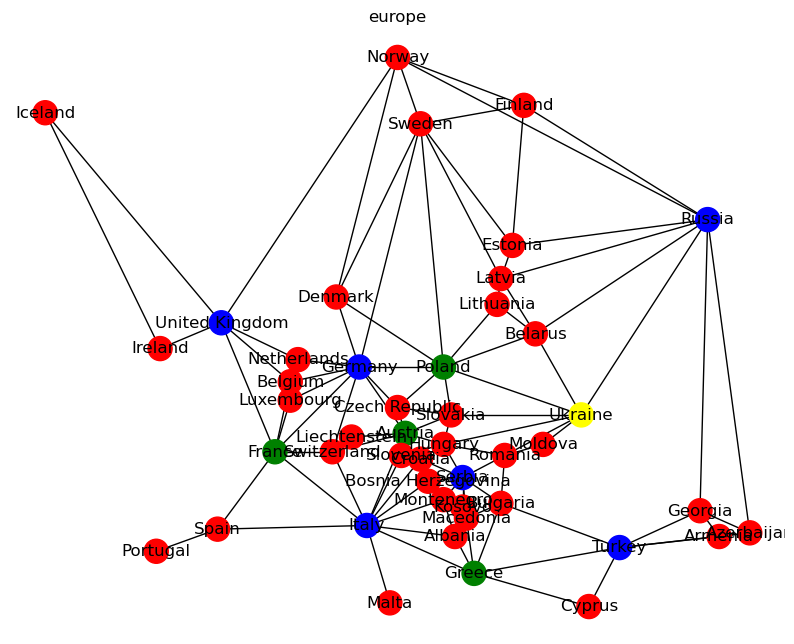

In [17]:
draw_map("europe", europe, (10,8), europe_colors)

nodes adjacent to node 22 are the following: 4, 5, 19, 21, 23, 24, 25, 28, 29, 31, 32
colors available to node 22 are the following: blue, green, red
color chosen is blue
nodes adjacent to node 9 are the following: 5, 6, 7, 8, 10, 12, 17, 18, 19, 21
colors available to node 9 are the following: blue, green, red
color chosen is blue
nodes adjacent to node 17 are the following: 9, 10, 12, 16, 18, 34, 35, 36
colors available to node 17 are the following: green, red
color chosen is green
nodes adjacent to node 19 are the following: 9, 18, 20, 21, 22, 32, 33, 34
colors available to node 19 are the following: green, red
color chosen is green
nodes adjacent to node 30 are the following: 26, 27, 28, 29, 31, 33, 38, 39
colors available to node 30 are the following: blue, green, red
color chosen is blue
nodes adjacent to node 45 are the following: 11, 13, 14, 15, 35, 36, 42, 44
colors available to node 45 are the following: blue, green, red
color chosen is blue
nodes adjacent to node 5 are the f

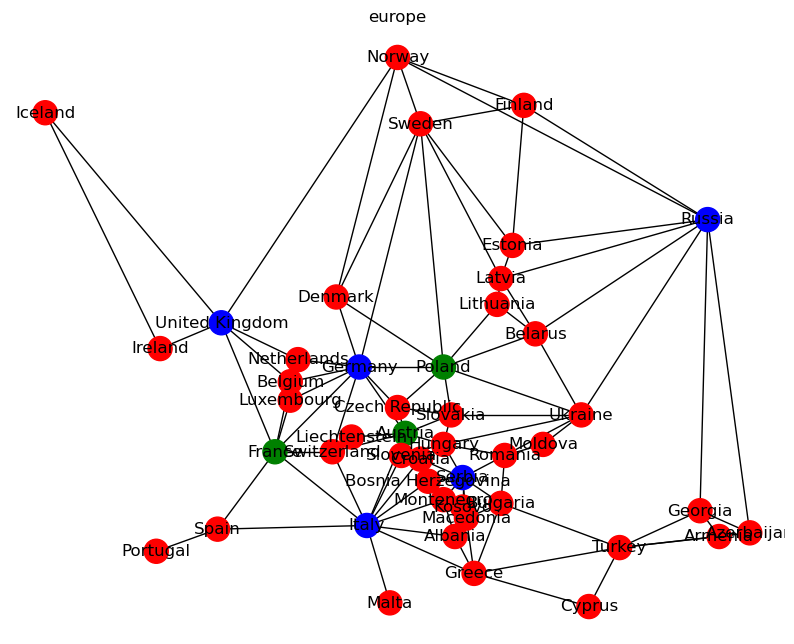

In [18]:
europe_colors = color_map(europe, ["red", "blue", "green"], trace=True)
if europe_colors:
     draw_map("europe", europe, (10,8), europe_colors)

## Before You Submit...

1. Did you provide output exactly as requested?
2. Did you re-execute the entire notebook? ("Restart Kernel and Rull All Cells...")
3. If you did not complete the assignment or had difficulty please explain what gave you the most difficulty in the Markdown cell below.
4. Did you change the name of the file to `jhed_id.ipynb`?

Do not submit any other files.

I struggled to figure out the backtracking which I think was the only thing that was wrong with my final result. The easier case with Connecticut worked out okay, it's just the larger case that I really needed the complex backtracking like in the lecture.

I understand the concept from the lecture where the node that causes other values to unavailable is how we track it and then skip back to the problem node, but the implementation seems extremely complicated and I could not figure it out. Like I get it when I write it out and do the referencing by hand, but I can't figure out how to code that.